# Alzheimer Analysis


## Introduction
In the context of Alzheimer disease, there have been multiple potential characteristics observed throughout the sample dataset. In the following, we will have a closer look on some medicine related terminology of characteristics, before diving deeper into correlations of certain characteristics with the alzheimer disease. 

### Mini-Mental State Examination
The Mini‐Mental State Examination (Folstein 1975), or MMSE, is a simple pen‐and‐paper test of cognitive function based on a total possible score of 30 points; it includes tests of orientation, concentration, attention, verbal memory, naming and visuospatial skills.

### Clinical Dementia Rating (CDR)
The CDR is based on a scale of 0–3: no dementia (CDR = 0), questionable dementia (CDR = 0.5), MCI (CDR = 1), moderate cognitive impairment (CDR = 2), and severe cognitive impairment (CDR = 3).

### Estimated total intacranial volume
The ICV measure, sometimes referred to as total intracranial volume (TIV), refers to the estimated volume of the cranial cavity as outlined by the supratentorial dura matter or cerebral contour when dura is not clearly detectable

### Normalized whole brain volume
Total brain volume (TBV) is another measure (to TIV) used to correct the head size variation across subjects. Using TBV may be more appropriate when interest is in how the brain structure volume changes with respect to the brain as a whole.

### Atlas scaling factor
Automated atlas transformation generated the Atlas Scaling Factor (ASF) defined as the volume-scaling factor required to match each individual to the atlas target. Because atlas normalization equates head size, the ASF should be proportional to TIV

## Business Questions
1) Which features provided in the dataset have the highest correlation to the alzheimer disease being positive?

2) Which features provided in the dataset have the highest correlation to the alzheimer disease being negative?

3) How well can the variance of having alzheimer disease be explained by the given features? 

## Methods used
After the data cleaning & formating process, descriptive statistics, exploratory data analysis and linear regression were the main methods used for solving the business questions on hand.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

df = pd.read_csv('alzheimer.csv')
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [2]:
df.shape

(373, 10)

In [3]:
df.info

<bound method DataFrame.info of            Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0    Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1    Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2       Demented   M   75    12  NaN  23.0  0.5  1678  0.736  1.046
3       Demented   M   76    12  NaN  28.0  0.5  1738  0.713  1.010
4       Demented   M   80    12  NaN  22.0  0.5  1698  0.701  1.034
..           ...  ..  ...   ...  ...   ...  ...   ...    ...    ...
368     Demented   M   82    16  1.0  28.0  0.5  1693  0.694  1.037
369     Demented   M   86    16  1.0  26.0  0.5  1688  0.675  1.040
370  Nondemented   F   61    13  2.0  30.0  0.0  1319  0.801  1.331
371  Nondemented   F   63    13  2.0  30.0  0.0  1327  0.796  1.323
372  Nondemented   F   65    13  2.0  30.0  0.0  1333  0.801  1.317

[373 rows x 10 columns]>

First and foremost, we rename the columns into more speaking column names.

In [4]:
df.rename(columns={'Group' : 'dementia_group', 'M/F' : 'gender'}, inplace=True)

In [5]:
df.rename(columns={'Gender' : 'gender', 'EDUC' : 'years_education', 'SES' : 'socioeconomic_status', 'MMSE' : 'mini_mentalstate_examination', 'CDR' : 'clinical_dementia_rating', 'eTIV' : 'estimated_total_intacranial_volume', 'nWBV' : 'normalized_whole_brain_volume', 'ASF' : 'atlas_scaling_factor'}, inplace=True)

In [6]:
df.head()

,dementia_group,gender,Age,years_education,socioeconomic_status,mini_mentalstate_examination,clinical_dementia_rating,estimated_total_intacranial_volume,normalized_whole_brain_volume,atlas_scaling_factor
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [7]:
df.rename(columns={'Age' : 'age'}, inplace=True)

In [8]:
df.head()

,dementia_group,gender,age,years_education,socioeconomic_status,mini_mentalstate_examination,clinical_dementia_rating,estimated_total_intacranial_volume,normalized_whole_brain_volume,atlas_scaling_factor
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [9]:
percent_missing = df.isnull().sum()
percent_missing

dementia_group                         0
gender                                 0
age                                    0
years_education                        0
socioeconomic_status                  19
mini_mentalstate_examination           2
clinical_dementia_rating               0
estimated_total_intacranial_volume     0
normalized_whole_brain_volume          0
atlas_scaling_factor                   0
dtype: int64

Due to the fact, that the proportion of missing values compared to the whole dataset is so low, we remove each row with missing values (total 19 rows).

In [10]:
df.dropna(axis=0, how='any', inplace=True)

In [11]:
percent_missing = df.isnull().sum()
percent_missing

dementia_group                        0
gender                                0
age                                   0
years_education                       0
socioeconomic_status                  0
mini_mentalstate_examination          0
clinical_dementia_rating              0
estimated_total_intacranial_volume    0
normalized_whole_brain_volume         0
atlas_scaling_factor                  0
dtype: int64

In [12]:
df.info

<bound method DataFrame.info of     dementia_group gender  age  years_education  socioeconomic_status  \
0      Nondemented      M   87               14                   2.0   
1      Nondemented      M   88               14                   2.0   
5      Nondemented      F   88               18                   3.0   
6      Nondemented      F   90               18                   3.0   
7      Nondemented      M   80               12                   4.0   
..             ...    ...  ...              ...                   ...   
368       Demented      M   82               16                   1.0   
369       Demented      M   86               16                   1.0   
370    Nondemented      F   61               13                   2.0   
371    Nondemented      F   63               13                   2.0   
372    Nondemented      F   65               13                   2.0   

     mini_mentalstate_examination  clinical_dementia_rating  \
0                           

In [13]:
df.dementia_group.value_counts()

Nondemented    190
Demented       127
Converted       37
Name: dementia_group, dtype: int64

In [14]:
cat_df = df.select_dtypes(include=['object']) #identifying the columns with categorical variables
cat_df

,dementia_group,gender
0,Nondemented,M
1,Nondemented,M
5,Nondemented,F
6,Nondemented,F
7,Nondemented,M
...,...,...
368,Demented,M
369,Demented,M
370,Nondemented,F
371,Nondemented,F


In [15]:
pd.get_dummies(df['gender'])

,F,M
0,0,1
1,0,1
5,1,0
6,1,0
7,0,1
...,...,...
368,0,1
369,0,1
370,1,0
371,1,0


In [16]:
df.gender.replace(to_replace='F', value='0', inplace=True) #replacing categorical variable for female "F" with 0 
df.gender.replace(to_replace='M', value='1', inplace=True) #replacing categorical variable for female "M" with 1

In [17]:
df.gender.replace(to_replace='0', value=0, inplace=True) #replacing categorical variable for female "F" with 0 
df.gender.replace(to_replace='1', value=1, inplace=True) #replacing categorical variable for female "M" with 1

In [18]:
df.dementia_group.replace(to_replace='Nondemented', value='0', inplace=True) #replacing categorical variable for nondemented with 0 
df.dementia_group.replace(to_replace='Demented', value='1', inplace=True) #replacing categorical variable for demented with 1

In [19]:
df.dementia_group.replace(to_replace='0', value=0, inplace=True) #replacing categorical variable for nondemented with 0 
df.dementia_group.replace(to_replace='1', value=1, inplace=True) #replacing categorical variable for demented with 1

For our business questions there is no need to specifically consider patients who converted to having the Alzheimer disease. Therefore, we consider each row with the entry "converted" the same way as "Demented". Thus, replacing it likewise with 1.

In [20]:
df.dementia_group.replace(to_replace='Converted', value=1, inplace=True) #replacing categorical variable for nondemented with 1 

In [21]:
df.dtypes

dementia_group                          int64
gender                                  int64
age                                     int64
years_education                         int64
socioeconomic_status                  float64
mini_mentalstate_examination          float64
clinical_dementia_rating              float64
estimated_total_intacranial_volume      int64
normalized_whole_brain_volume         float64
atlas_scaling_factor                  float64
dtype: object

In [22]:
df.dementia_group.value_counts()

0    190
1    164
Name: dementia_group, dtype: int64

#### Solving Business Questions 1 & 2:

In [23]:
corrM = df.corr() # here we create the correlation matrix of the dataframe
corrM

,dementia_group,gender,age,years_education,socioeconomic_status,mini_mentalstate_examination,clinical_dementia_rating,estimated_total_intacranial_volume,normalized_whole_brain_volume,atlas_scaling_factor
dementia_group,1.000000,0.223649,-0.003311,-0.163307,0.062463,-0.527441,0.773560,-0.033780,-0.313929,0.021401
gender,0.223649,1.000000,-0.027910,0.089937,-0.045776,-0.159501,0.205822,0.571443,-0.241709,-0.560791
age,-0.003311,-0.027910,1.000000,-0.024977,-0.046857,0.055880,-0.022759,0.040182,-0.526316,-0.031783
years_education,-0.163307,0.089937,-0.024977,1.000000,-0.722647,0.184459,-0.129440,0.267933,-0.019822,-0.251677
socioeconomic_status,0.062463,-0.045776,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
mini_mentalstate_examination,-0.527441,-0.159501,0.055880,0.184459,-0.149219,1.000000,-0.705962,-0.019439,0.341381,0.027745
clinical_dementia_rating,0.773560,0.205822,-0.022759,-0.129440,0.076160,-0.705962,1.000000,0.052361,-0.350086,-0.063413
estimated_total_intacranial_volume,-0.033780,0.571443,0.040182,0.267933,-0.261575,-0.019439,0.052361,1.000000,-0.206668,-0.989030
normalized_whole_brain_volume,-0.313929,-0.241709,-0.526316,-0.019822,0.090095,0.341381,-0.350086,-0.206668,1.000000,0.211150
atlas_scaling_factor,0.021401,-0.560791,-0.031783,-0.251677,0.255576,0.027745,-0.063413,-0.989030,0.211150,1.000000


To get a better overview and clearer visualization, we use the seaborn library to depict the correlation matrix in a heatmap:

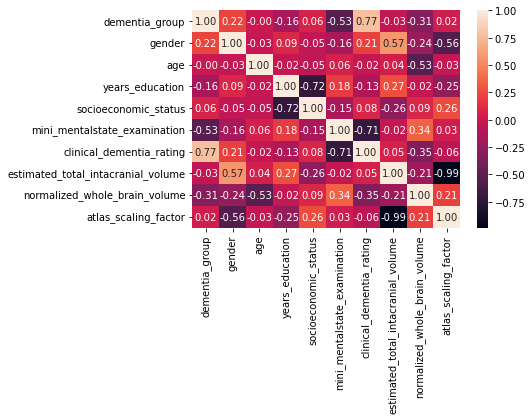

In [24]:
sns.heatmap(df.corr(), annot=True, fmt='.2f'); # here we create a heatmap to intuitevely illustrate the correlations among the given features

**1. Which features provided in the dataset have the highest correlation to the alzheimer disease being positive?**

Clearly, the clinical dementia rating with a correlation of 0.77 to dementia group has the highest positive correlation to the alzheimer disease in the given dataset. With 0.77 we found a strong correlation to our target variable, meaning that with a higher clinical dementia rating it is more likely for the patient to be demented.

**2. Which features provided in the dataset have the highest correlation to the alzheimer disease being negative?**

Clearly, the minimal mentalstate examination has a negative medium-level correlation to the alzheimer disease meaning that the lower the minimal mentalstate examination of a given person is, the higher the probability of the person being demented. Or in other words: The higher the minimal mentalstate examination is, the lower the probability of the person being demented.

#### Solving Business Question 3:

Now we will start with modelling through linear regression.

In [25]:
#Split into explanatory and response variables
X = df[['gender', 'age', 'years_education', 'socioeconomic_status', 'mini_mentalstate_examination', 'clinical_dementia_rating', 'estimated_total_intacranial_volume', 'normalized_whole_brain_volume', 'atlas_scaling_factor']]
y = df[['dementia_group']]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.5699084294433614 on 107 values.'

With the r-squared score of the linear regression we can see that 57% of the variance of the response variable is explained by the variance of the explanatory variables. Therefore, more features are required to get a broader and more sophisticated view on the Alzheimer disease prediction.

**3) How well can the variance of having alzheimer disease be explained by the given fetures?**

Using linear regression, we can explain up to 57% of the variance of the response variable (alzheimer disease) with the explanatory variables (given features). 


## Last Words

We used the given dataset as a playing ground for descriptive statistics and exploratory data analysis in the context of the alzheimer disease. Hereby, the clinical dementia rating seems to be a good starting point in predicting the potential outbreak of alzheimer. However, a bigger dataset, more features and especially deeper data analysis with more sophisticated models are needed to explain a broader variance and potential outbreak of alzheimer.

Thanks for your interest!